In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

df = pd.read_csv(r"C:\Users\seanr\OneDrive\Desktop\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 DATA EXPLORATION

In [33]:
df.shape

(10000, 14)

In [34]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
## Check the missing Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [36]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [38]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [39]:
df.corr()

C:\Users\seanr\AppData\Local\Temp\ipykernel_25812\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


VISUALIZATIONS

C:\Users\seanr\AppData\Local\Temp\ipykernel_25812\2032425523.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Blues", annot=True)


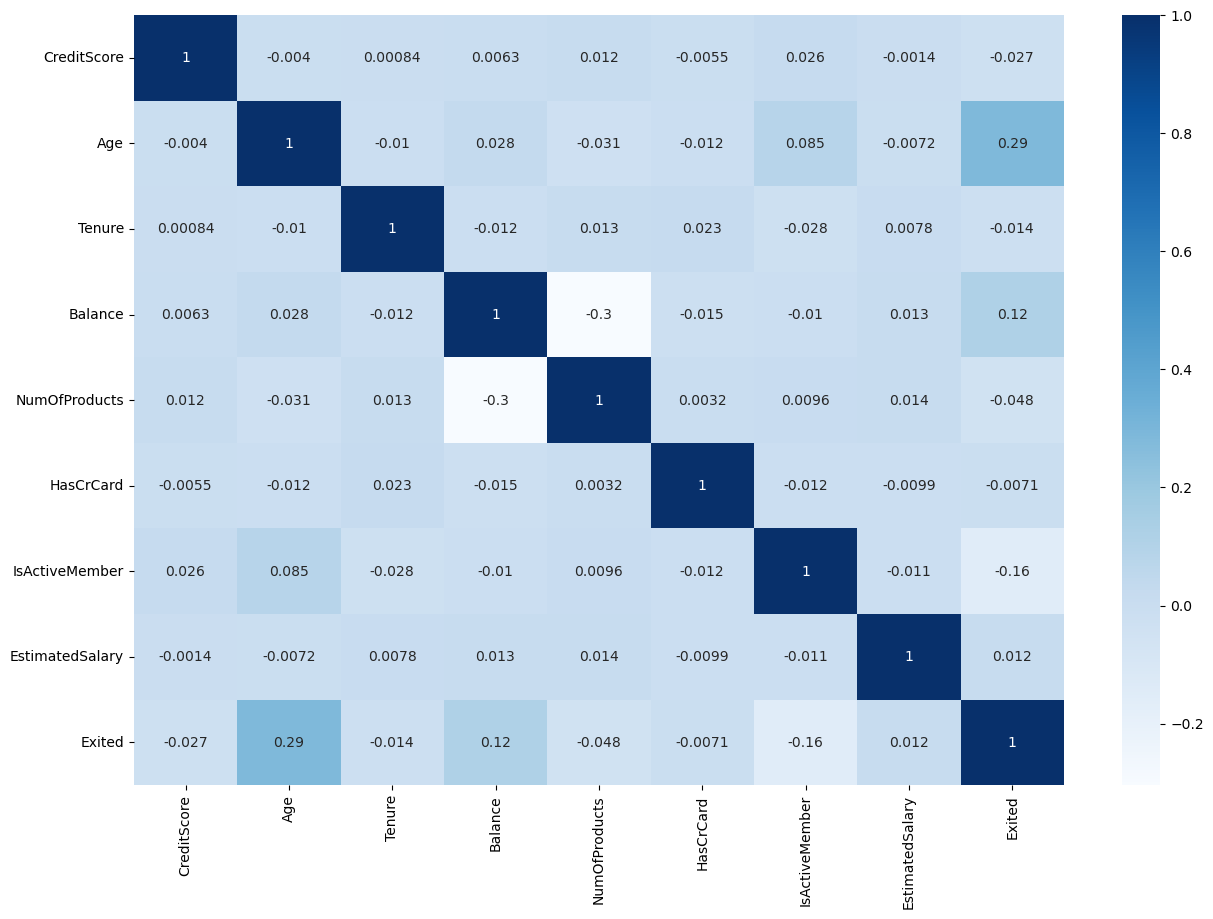

In [40]:

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

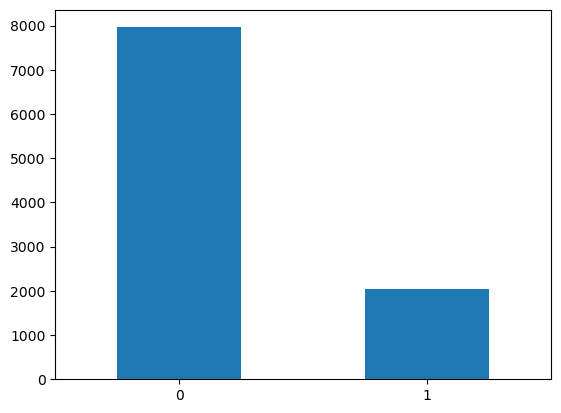

In [41]:
df["Exited"].value_counts().plot(kind="bar",rot=0)
plt.show()

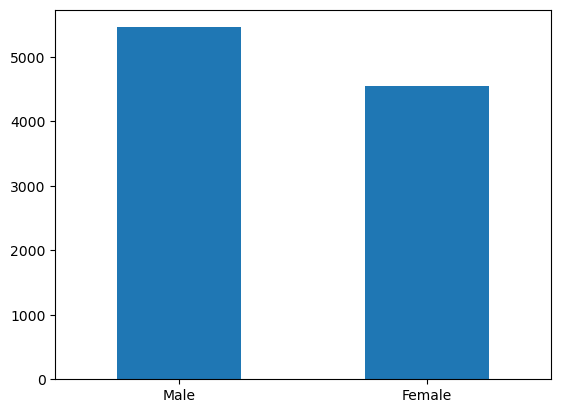

In [42]:
df["Gender"].value_counts().plot(kind="bar",rot=0)
plt.show()

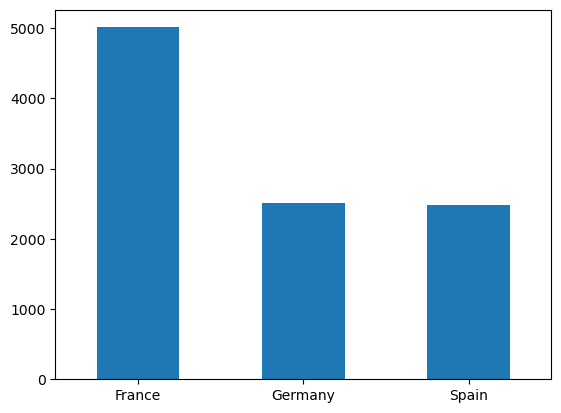

In [43]:
df["Geography"].value_counts().plot(kind="bar",rot=0)
plt.show()

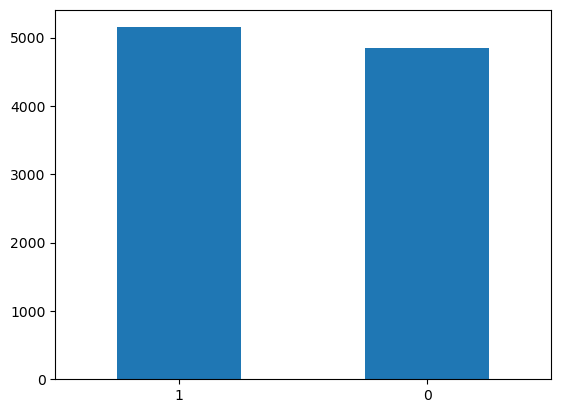

In [44]:
df["IsActiveMember"].value_counts().plot(kind="bar",rot=0)
plt.show()

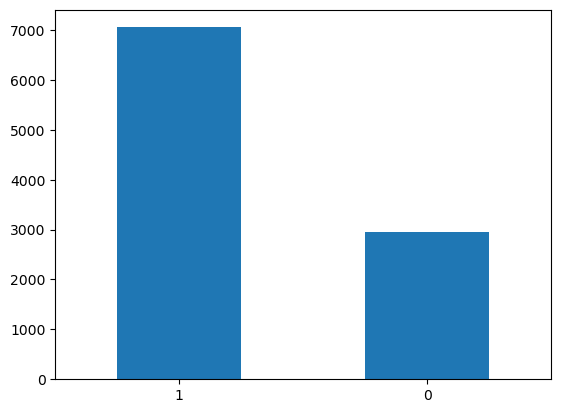

In [45]:
df["HasCrCard"].value_counts().plot(kind="bar",rot=0)
plt.show()

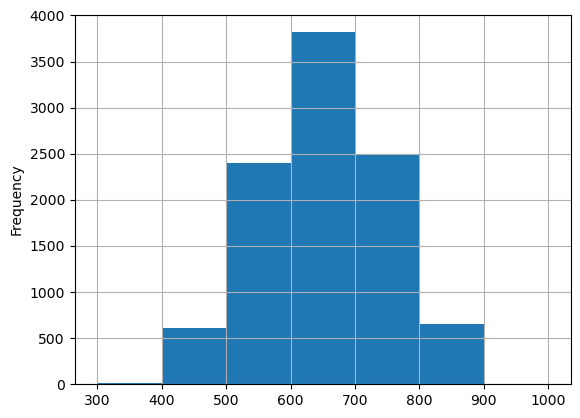

In [46]:
df["CreditScore"].plot(kind = 'hist',xticks=[300,400,500,600,700,800,900,1000],bins=[300,400,500,600,700,800,900,1000])
plt.grid()

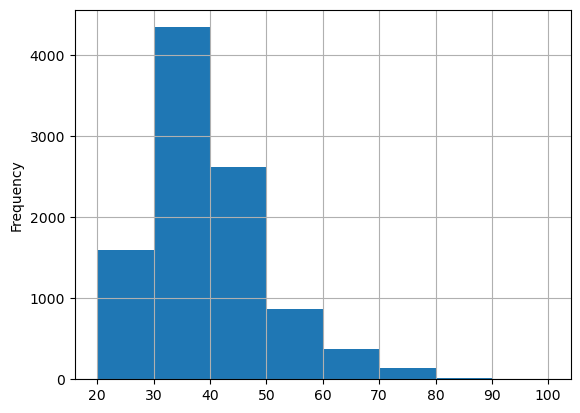

In [47]:
df["Age"].plot(kind = 'hist',xticks=[20,30,40,50,60,70,80,90,100],bins=[20,30,40,50,60,70,80,90,100])
plt.grid()

array([[<Axes: title={'center': 'Tenure'}>]], dtype=object)

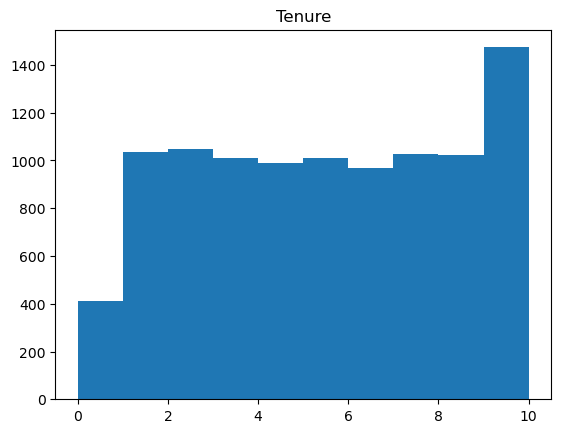

In [48]:
df.hist(column="Tenure",bins=10,grid=False)

array([[<Axes: title={'center': 'Balance'}>]], dtype=object)

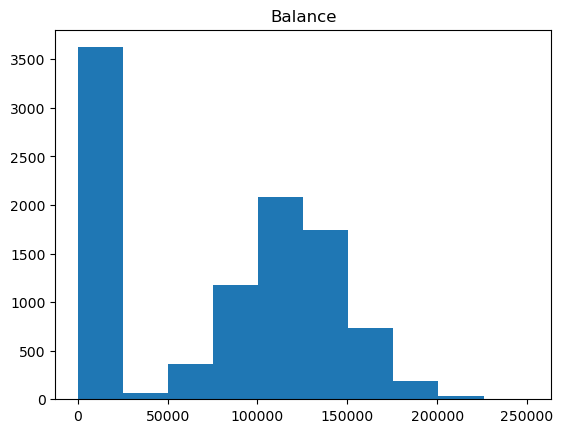

In [49]:
df.hist(column="Balance",bins=10,grid=False)

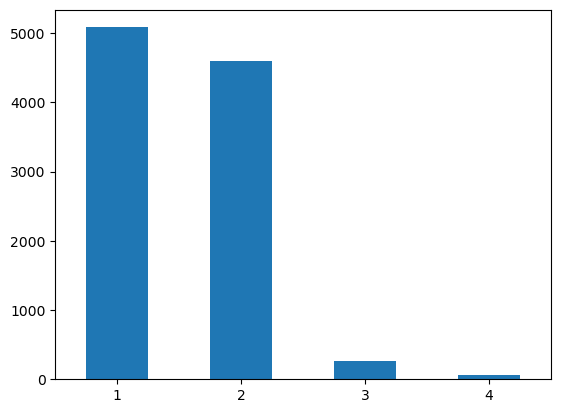

In [50]:
df["NumOfProducts"].value_counts().plot(kind="bar",rot=0)
plt.show()

array([[<Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

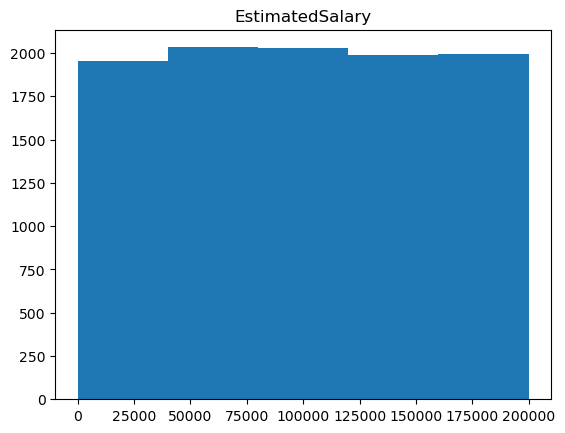

In [51]:
df.hist(column="EstimatedSalary",bins=5,grid=False)

# PREPROCESSING

In [52]:
# GENERATING BOX PLOTS TO CHECK FOR OUTLIERS

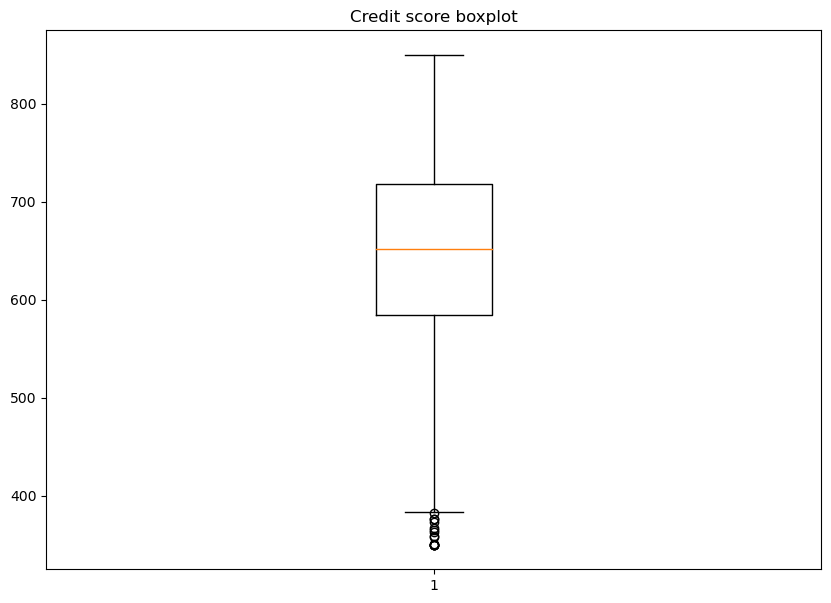

In [53]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df["CreditScore"])
plt.title("Credit score boxplot")
plt.show()

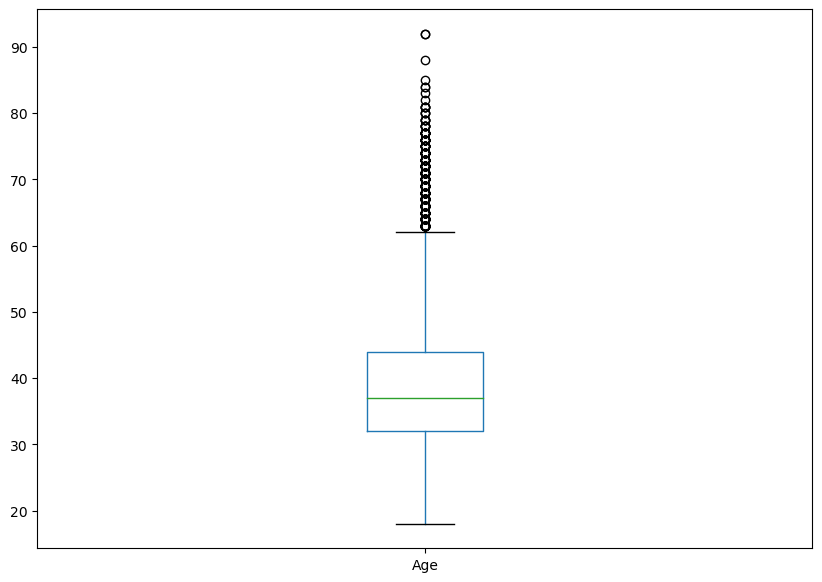

In [54]:

df.boxplot("Age",grid=False,figsize =(10, 7))
plt.show()


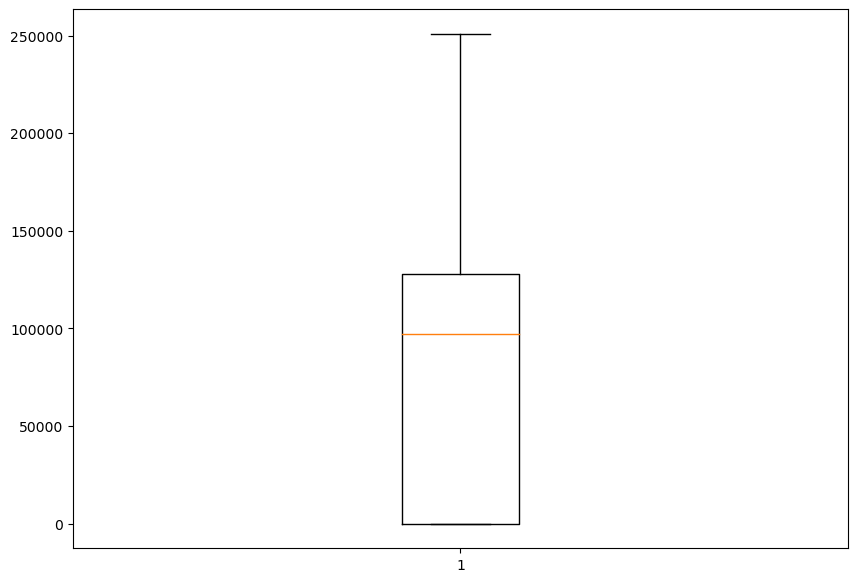

In [55]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df["Balance"])
plt.show()

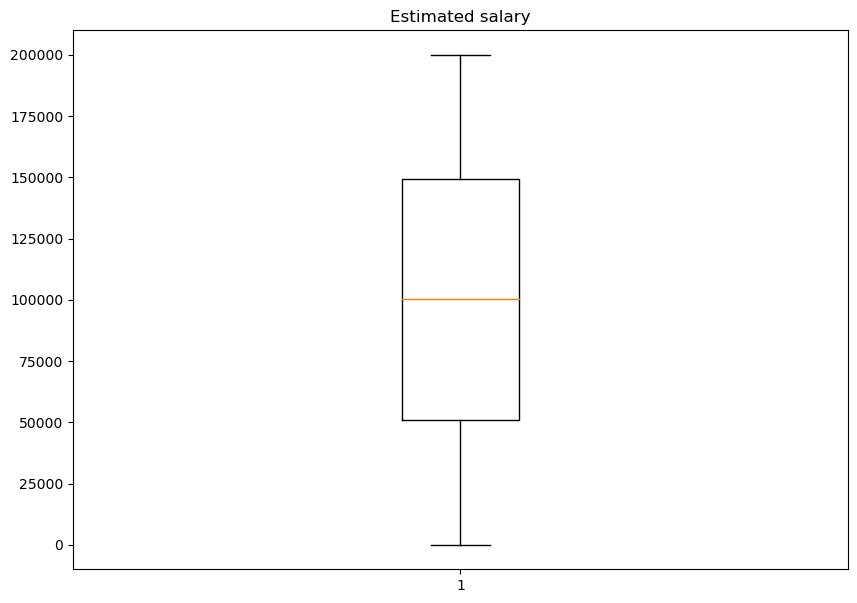

In [56]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df["EstimatedSalary"])
plt.title("Estimated salary")
plt.show()

DEALING WITH OUTLIERS



In [57]:
# AGE OUTLIERS

q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)

iqr=q3-q1
iqr

upper=q3+1.5*iqr
lower=q1-1.5*iqr


df=df[df["Age"]<=upper]
df=df[df["Age"]>=lower]


df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [58]:
#CREDIT SCORE OUTLIERS

q1=df["CreditScore"].quantile(0.25)
q3=df["CreditScore"].quantile(0.75)

iqr=q3-q1
iqr

upper=q3+1.5*iqr
lower=q1-1.5*iqr


    
df=df[df["CreditScore"]<=upper]
df=df[df["CreditScore"]>=lower]


In [59]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# PREPROCESSING

In [60]:
#create dummy variables 

geography=pd.get_dummies(df["Geography"])
gender=pd.get_dummies(df["Gender"])

df=pd.concat([df,geography,gender],axis=1)
df=df.drop(["Geography","Gender"],axis=1)

df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [61]:
# separating independent and dependent features


y=df.iloc[:,8]

x=df.drop(["Exited"],axis=1)


In [62]:
#train test split


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [63]:
#scaling values

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [64]:
x_train.shape

(7701, 13)

In [66]:
x_train

array([[-0.19985205,  0.70720398, -0.6971794 , ..., -0.57690044,
         1.09988913, -1.09988913],
       [ 0.55115346, -0.20276726,  0.68845285, ..., -0.57690044,
        -0.90918255,  0.90918255],
       [-0.47104848,  0.82095039, -0.00436328, ..., -0.57690044,
        -0.90918255,  0.90918255],
       ...,
       [ 0.55115346, -0.20276726,  1.03486091, ...,  1.73340133,
        -0.90918255,  0.90918255],
       [-0.49190975, -1.34023131, -0.6971794 , ...,  1.73340133,
         1.09988913, -1.09988913],
       [-1.29506842, -0.54400647,  1.38126897, ...,  1.73340133,
        -0.90918255,  0.90918255]])


# MODEL TRAINING:

LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()


LogisticRegression()

IMPORTANT PARAMETERS TO TUNE:

1)penalty  - Type of regularization ( L2 for ridge ,L1 for Lasso and elasticnet which is L1+L2 combined)

2) C - Inverse of regularization strength

3)solver - Algorithm used for optimization 

#'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


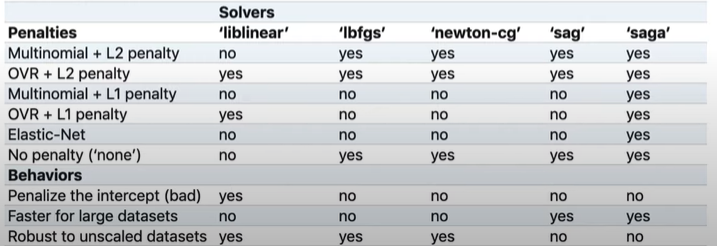

In [26]:
from sklearn.model_selection import GridSearchCV

parameters={"penalty":["l2","l1","elasticnet"],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

model_classifier=GridSearchCV(model,parameters,scoring="accuracy",cv=10)

model_classifier.fit(x_train,y_train)



C:\Users\seanr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\seanr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\seanr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\seanr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\seanr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\seanr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\seanr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\seanr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\seanr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\seanr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\seanr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\seanr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [28]:
print(model_classifier.best_params_)
print(model_classifier.best_score_)

{'C': 0.01, 'penalty': 'l2'}
0.8245678575639666


In [78]:
model=LogisticRegression(penalty="l1",C=0.01,solver='saga')
model.fit(x_train,y_train)

LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [79]:
y_pred=model.predict(x_test)

In [80]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

score=accuracy_score(y_test,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8265835929387332


In [81]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1808
           1       0.22      0.73      0.34       118

    accuracy                           0.83      1926
   macro avg       0.60      0.78      0.62      1926
weighted avg       0.93      0.83      0.87      1926



In [82]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

Actual        0    1
Predicted           
0          1506  302
1            32   86


KNN


KNN PARAMETERS TO TUNE:
    
1) n_neighbors  - NUMBER OF NEIGHBORS TO CONSIDER 

2) weights   -  ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
               ‘distance’ : weight points by the inverse of their distance.
               
3) alogorithm can be kept as deafult which is "auto " else "algorithm":[ "ball_tree", "kd_tree", "brute"], auto usually selects    the best alg

4) p:   p=1 uses manhattan distance while p=2 uses eulidean distance to calculate distance between points

In [83]:
from sklearn.neighbors import KNeighborsClassifier 
  
knn=KNeighborsClassifier()

parameters={"n_neighbors":[2,3,4,5,6,7,8,9,10,15,20,30],"weights":["uniform","distance"],"algorithm":[ "ball_tree", "kd_tree", "brute"],"p":[1,2]}

knn_classifier=GridSearchCV(knn,parameters,scoring="accuracy",cv=10)

knn_classifier.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                         30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [84]:
print(knn_classifier.best_params_)
print(knn_classifier.best_score_)

{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
0.8365130459682988


In [85]:
y_pred=knn_classifier.predict(x_test)

score=accuracy_score(y_test,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8302180685358256


In [86]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1761
           1       0.29      0.68      0.41       165

    accuracy                           0.83      1926
   macro avg       0.63      0.76      0.65      1926
weighted avg       0.91      0.83      0.86      1926



In [87]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

Actual        0    1
Predicted           
0          1486  275
1            52  113


DECISION TREE

If we use default parameters, our model will always overfit ,ie we will get 100% accuracy on train data but much lesser accuracy on testing data,hence we must modify parameters manually and check that the model doesnt overfit. We can do this by pruning the trees and restricting the height of the tree by parameters like min impurity decrease, min samples leaf, max depth etc.

WE MUST TRY DIFFERENT COMBINATIONS OF PARAMETERS TO MAKE SURE THE MODEL DOES NOT OVERFIT AND  THE ACCURACY IS HIGH ON BOTH THE TRAINING AND TEST SET.

PARAMETER VALUE OPTIONS:

parameters=
{"criterion: ["gini","entropy","log_loss"],"max_depth[None,10,20,30,40,50,60,100],"min_samples_split":range(1,40),
"min_samples_leaf":range(1,20),"min_impurity_decrease":[0.001,0.002,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
"ccp_alpha":[0.0001,0.0002,0.001,0.002,0.005,0.01}

CCP ALPHA IS USED FOR PRUNNING

BY MANUAL EXPERIMENTATION ,just using Min impurity decrease and not ccp_alpha can get us best accuracy

NOTE GINI IS FASTER THAN ENTROPY SINCE ENTROPY INVOLVES LOG CALCULATION

In [88]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(criterion="entropy",max_depth=None,min_samples_split=21,min_samples_leaf=21,min_impurity_decrease=0.001)


d_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.001,
                       min_samples_leaf=21, min_samples_split=21)

In [89]:
# TRAINING SET ACCURACY

y_pred=d_tree.predict(x_train)

score=accuracy_score(y_train,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8602778859888326


In [90]:
#TESTING SET ACCURACY

y_pred=d_tree.predict(x_test)


score=accuracy_score(y_test,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8650051921079959


In [91]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1708
           1       0.45      0.79      0.57       218

    accuracy                           0.87      1926
   macro avg       0.71      0.83      0.75      1926
weighted avg       0.91      0.87      0.88      1926



In [92]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

Actual        0    1
Predicted           
0          1493  215
1            45  173


RANDOM FOREST


PARAMETER TUNING :

Apparently using default parameters led to overfitting.
- 5 samples per node and leaf worked best for this data set
-bootstarp = True allows for using bootstrap data sets to create each tree ,max samples =0.75 sets the number of samples to take               in your bootstrap dataset
- max_ features is the maximum number of features to consider while creating each tree (max_features= None forces the model to  
  take all features while creating each tree
  
- More efficient to try different combinations manually than using grid_cv , as grid cv takes a lot of computational time
- rf_classifier.oob_score_ gives us the out of bag error score (The samples that were left out while creating a boostrap dataset for each tree are the out of bag samples , they are run down the trees of the random forest to check their predicted value and a out of bar error and score is calculated based on number of out of bags samples predicted right)



parameters= 
{"criterion: ["gini","entropy","log_loss"],"max_depth":[None,10,20,30,40,50,60,100],"min_samples_split":range(4,40), "min_samples_leaf":range(4,40),"min_impurity_decrease":[0.000001,0.000002,0.000005,0.005],bootstrap=True, max_samples=0.75, max_features=["sqrt","log2"], oob_score=True}


In [95]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion="entropy",min_samples_split=5,min_samples_leaf=5,min_impurity_decrease=0.000001,bootstrap=True,max_samples=0.75,max_features="sqrt",oob_score=True)


rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       max_samples=0.75, min_impurity_decrease=1e-06,
                       min_samples_leaf=5, min_samples_split=5, oob_score=True)

In [96]:
rf_classifier.oob_score_

0.8583300870016881

In [97]:
# TRAINING SET ACCURACY

y_pred=rf_classifier.predict(x_train)


score=accuracy_score(y_train,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8972860667445787


In [98]:
#TESTING SET ACCURACY

y_pred=rf_classifier.predict(x_test)

score=accuracy_score(y_test,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8722741433021807


In [99]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      1708
           1       0.46      0.83      0.59       218

    accuracy                           0.87      1926
   macro avg       0.72      0.85      0.76      1926
weighted avg       0.92      0.87      0.89      1926



In [100]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

Actual        0    1
Predicted           
0          1500  208
1            38  180


SVM

RBF KERNEL GIVES US THE BEST SCORE FOLLOWED BY POLYNOMIAL AFTER PERFORMING GRID SERACH USING DEFAULT PARAMETERS, 
HENCE WE SHALL TRY USING POLYNOMIAL AND RGF KERNEL

In [29]:
from sklearn.svm import SVC


svm = SVC() 

parameters={"kernel":["linear", "poly", "rbf", "sigmoid"]}

svm=GridSearchCV(svm,parameters,scoring="accuracy",cv=5)

svm.fit(x_train, y_train) 




GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [30]:
print(svm.best_params_)
print(svm.best_score_)

{'kernel': 'rbf'}
0.8549537743243129


In [ ]:
PARAMETERS TO TUNE 
 
COMMON PARAMETERS ( FOR ALL KERNELS):
    - C : REGULARIZATION PARAMETER HIGHER THE VALUE LESSER THE REGULARIZATION , LOW VALUES ALLOW MORE MISSCLASSIFCATIONS
    - KERNEL : TYPE OF KERNEL
        
PARAMETERS FOR POLYNOMIAL KERNEL: (a x b + coe)^degree  = higher dimension relation between 2 points a and b
    - DEGREE: WHAT DIMENSION DO YOU WANT TO TRANSFORM YOUR DATA POINTS INTO?
    - COEF0 : COEFICIENT OF POLYNOMIAL ( USED TO SHIFT OBESERVATIONS ON THE SAME AXIS )
        
PARAMETERS FOR RADIAL KERNEL (RBF) : e ^ ( -gamma*(a-b)^2)  = infinite dimension relationship between any two points a and b 
     - GAMMA : KERNEL COE FOR RBF WHICH SCALES THE SQUARED DISTANCE BETWEEN TWO POINTS a and b 
        
      NOTE :LARGE VALUES OF GAMMA LEAD TO OVERFITTING

LETS TRY POLYNOMIAL KERNEL AND FIND BEST PARAMETERS USING GRID SEARCH

In [ ]:
svm = SVC()

parameters={"kernel":["poly"],"C":[0.001,0.01,0.1,1,10],"degree":[2,3,4,5],"coef0":[0,0.5,1,2]}
            
svm=GridSearchCV(svm,parameters,scoring="accuracy",cv=10)

svm.fit(x_train, y_train)    

print(svm.best_params_)
print(svm.best_score_)

APPLY THE OPTIMAL PARAMETER VALUES FOUND USING GRID SEARCH 

In [79]:
from sklearn.svm import SVC

svm = SVC(kernel='poly',C=10,degree=3,coef0=1) 
svm.fit(x_train, y_train) 

SVC(C=10, coef0=1, kernel='poly')

In [80]:
# TRAINING SET ACCURACY

y_pred=svm.predict(x_train)


score=accuracy_score(y_train,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8694974678613168


In [78]:
#TESTING SET ACCURACY

y_pred=svm.predict(x_test)

score=accuracy_score(y_test,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8634475597092419


LETS TRY RBF KERNEL AND FIND THE PARAMETERS WITH BEST ACCURACY

In [55]:
svm = SVC()

parameters={"kernel":["rbf"],"C":[0.0001,0.001,0.01,0.1,1,10,100],"gamma":[1,0.1,0.01,0.001,0.0001]}
            
svm=GridSearchCV(svm,parameters,scoring="accuracy",cv=10)

svm.fit(x_train, y_train)    

print(svm.best_params_)
print(svm.best_score_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.854824565836239


APPLYING RGB KERNEL WITH OPTIMAL PARAMETERS

In [90]:


from sklearn.svm import SVC

svm = SVC(kernel='rbf',C=1000,gamma=0.01) 
svm.fit(x_train, y_train) 


SVC(C=1000, gamma=0.01)

In [91]:
# TRAINING SET ACCURACY

y_pred=svm.predict(x_train)


score=accuracy_score(y_train,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8700168809245552


In [92]:
#TESTING SET ACCURACY

y_pred=svm.predict(x_test)

score=accuracy_score(y_test,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8639667705088265


BY EXPERIMENTATION, SETTING C=1000 GIVES US SLIGHT INCREASE IN ACCURACY

In [ ]:
print(classification_report(y_pred,y_test))

In [ ]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

NAIVE BAYES

1) Gaussian Naive Bayes is optimal when your features are normally distributed

2) Bernoulli Naive Bayes is optimal when you have binary features

3) Multinomial is optimal when your features(categorical or continous) describe descrete frequency counts (eg. word counts )

In [ ]:
TRYING  GAUSSIAN NAIVE BAYES

In [94]:
from sklearn.naive_bayes import GaussianNB
 

naive_bayes = GaussianNB()
 
naive_bayes.fit(x_train , y_train)

GaussianNB()

In [96]:
#TESTING SET ACCURACY

y_pred=naive_bayes.predict(x_test)

score=accuracy_score(y_test,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.829698857736241


TRYING BERNOULLI NAIVE BAYES

In [101]:
from sklearn.naive_bayes import BernoulliNB
 

naive_bayes = BernoulliNB(binarize=0.9)
 
naive_bayes.fit(x_train , y_train)

#TESTING SET ACCURACY

y_pred=naive_bayes.predict(x_test)

score=accuracy_score(y_test,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8457943925233645


BERNOULLI NAIVE BAYES GIVES BETTER ACCURACY

In [102]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1735
           1       0.36      0.74      0.49       191

    accuracy                           0.85      1926
   macro avg       0.67      0.80      0.70      1926
weighted avg       0.91      0.85      0.87      1926



In [103]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

Actual        0    1
Predicted           
0          1488  247
1            50  141


ADA BOOST

PARAMETER TUNING :
    
N ESTIMATORS : NUMBER OF TREE STUMPS TO CREATE IF DECISION TREE WAS USED AS AN ESTIMATOR , DEFAULT = 50
               AFTER TRYING A FEW VALUES RANGING FROM 10 - 100 , 20 STUMPS GAVE US THE HIGHEST ACCURACY ON THE TEST DATA
               
learning_rate: DEFAULT VALUE OF 1 GIVES US GOOD RESULTS


In [104]:
from sklearn.ensemble import AdaBoostClassifier

model=AdaBoostClassifier(n_estimators=20)

model.fit(x_train , y_train)

AdaBoostClassifier(n_estimators=20)

In [105]:
#TESTING SET ACCURACY

y_pred=model.predict(x_test)

score=accuracy_score(y_test,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8618899273104881


In [106]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1666
           1       0.49      0.73      0.59       260

    accuracy                           0.86      1926
   macro avg       0.72      0.81      0.75      1926
weighted avg       0.89      0.86      0.87      1926



In [107]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

Actual        0    1
Predicted           
0          1469  197
1            69  191


GRADIENT BOOSTING

class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

IMPORTANT PARAMETERS TO TUNE :

1) LEARNING RATE

2) MAX DEPTH

FIRST WE TRY TO FIND OPTIMAL PARAMETERS USING GRID SEARCH

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier()

parameters={'n_estimators':[100, 200], 'learning_rate': [0.1,0.2,0.3,0.5,0.01,0.05,0.02], 'max_depth':[2,3, 4,6], 'min_samples_leaf':[3,5,9],"max_leaf_nodes":[4,6,8,10,12]}

GB_Classifier = GridSearchCV(model,parameters,scoring="accuracy",cv=10)

GB_Classifier.fit(x_train, y_train)    

print(GB_Classifier.best_params_)
print(GB_Classifier.best_score_)

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,min_samples_leaf=5,min_samples_split=5,max_leaf_nodes=8)

model.fit(x_train,y_train)

GradientBoostingClassifier(max_leaf_nodes=8, min_samples_leaf=5,
                           min_samples_split=5)

In [111]:
y_pred=model.predict(x_test)


accuracy_score(y_test,y_pred)

0.8655244029075805

In [112]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1673
           1       0.49      0.75      0.60       253

    accuracy                           0.87      1926
   macro avg       0.73      0.82      0.76      1926
weighted avg       0.90      0.87      0.88      1926



In [113]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

Actual        0    1
Predicted           
0          1476  197
1            62  191


XG BOOST

PARAMETERS TO TUNE :
    
1) Learning rate eta  (default =0.3) , we can use 0.05 to 0.3 

2) max_depth : Max length of tree (default =6)  , can use 3-10
    
3) min_child_weight This is the cover threshhold (default=1) 

4) lambda : Regularization parameter  (default =1)
    
5) colsample_bytree : the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
                    default = 1 which means use all features , Typical values range between 0.5-0.9.          
        
6)  gamma : Gamma specifies the minimum loss reduction required to make a split.(default = 0)
    
    
7) n_estimators : number of trees

8) scale_pos_weight = 1   if high class imbalance present.


NOTE : XG BOOST ALSO ALLOWS PARALLLEL COMPUTING USING THREADS PARAMETER ,THUS MAKING IT FASTER (DEFAULT USE ALL PROCESSING CORES)
NOTE : XG BOOST CAN ALSO DEAL WITH MISSING VALUES BY USING PARAMETER "missing"
    
    
    

In [118]:
from sklearn.model_selection import RandomizedSearchCV

model=XGBClassifier()

parameters= {"learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,"max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],"min_child_weight" : [0, 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,1 ],"scale_pos_weight":[1,0]}

random_search=RandomizedSearchCV(model,param_distributions=parameters,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

random_search.fit(x_train,y_train)

print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'scale_pos_weight': 1, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.4}
0.8610569119394558


FURTHER TUNING PARAMETERS TO INCREASE ACCURACY

THE FOLLOWING SETTINGS GIVE US THE MAXIMUM ACCURACY

In [114]:
from xgboost import XGBClassifier


model=XGBClassifier(n_estimators=100,learning_rate=0.05,max_depth=6,min_child_weight=0,gamma=0,reg_lambda=1,reg_alpha=0,scale_pos_weight = 1)

model.fit(x_train,y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [115]:
#TRAING SET ACCURACY

y_pred=model.predict(x_train)


score=accuracy_score(y_train,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8888456044669524


In [116]:
#TESTING SET ACCURACY

y_pred=model.predict(x_test)

score=accuracy_score(y_test,y_pred)

print("ACCURACY:",score)

ACCURACY: 0.8717549325025961


In [117]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1675
           1       0.51      0.78      0.61       251

    accuracy                           0.87      1926
   macro avg       0.73      0.83      0.77      1926
weighted avg       0.90      0.87      0.88      1926



In [118]:
confusion_matrix = pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])
print(confusion_matrix)

Actual        0    1
Predicted           
0          1483  192
1            55  196


PREDICTION USING ARTIFICIAL NEURAL NETWORK:

ANN

In [123]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.activations import relu,sigmoid
from keras.layers import Activation,Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def create_model(layers,activation):
    model=Sequential()
    
    for i,nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=x_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units=1,activation="sigmoid",kernel_initializer="glorot_uniform"))
    
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    
    return model
    
    

In [124]:
model=KerasClassifier(build_fn = create_model,verbose=0)

param_grid= dict(layers=[[20],[40,20],[45,30,15]],activation=["relu","sigmoid"],batch_size=[128,255],epochs=[30])

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

grid_result = grid.fit(x_train,y_train)

C:\Users\seanr\AppData\Local\Temp/ipykernel_17244/2011548407.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn = create_model,verbose=0)


In [126]:
grid_result.best_params_
grid_result.best_score_

0.8574213862419129

In [127]:
from sklearn.metrics import accuracy_score

y_pred=grid.predict(x_test)
y_pred=(y_pred>0.5)

score=accuracy_score(y_test,y_pred)

print("ACCURACY:",score)

61/61 [==============================] - 0s 598us/step
ACCURACY: 0.8592938733125649
